In [151]:
import pandas as pd
import matplotlib.pyplot as plt

We report the explanations for each column of our dataset file below.

__species_code__: Unique alphanumeric code, usually six-letters, used to identify the species in the eBird database. These codes are used in most URLs from eBird, including eBird Status & Trends products.

__taxon_order__ : The numeric value assigned to this taxon in the eBird/Clements taxonomy to arrange the species in the latest taxonomic sequence.

__common_name__ : The primary English common name of the species in the eBird/Clements taxonomy.

__scientific_name__ : The scientific name of the species in the eBird/Clements taxonomy.

__version_year__ : The version year for the eBird Status & Trends products.

__region_type__ : Two possible values: country or state (subregion).

__region_code__ : The alphanumeric code of the country or state.

__region_name__ : The name of the country or state.

__region_area_km2__ : The area of the region in square kilometers.

__season_name__ : The name of the season with the following possible values: breeding, nonbreeding, postbreeding_migration, prebreeding_migration, or year_round. Note that in the Northern Hemisphere these correspond roughly to summer, winter, fall migration, and spring migration. Each season definition is unique to the species and defined through expert review. Breeding and nonbreeding are primarily stationary periods, prebreeding migration is the period of migratory movement as birds return to the breeding grounds, and postbreeding migration is the period of migratory movement as birds depart the breeding grounds.

__start_dt__ : The start date for the season in ISO format (i.e. YYYY-MM-DD).

__end_dt__ : The end date for the season in ISO format (i.e. YYYY-MM-DD).

__abundance_mean__ : The average (mean) estimated relative abundance within the selected region for a given season.

__total_pop_percent__ : This percentage is calculated as the sum of the estimated relative abundance within the selected region divided by the sum of the estimated relative abundance, given that a majority of a species' entire range has been modeled for a particular season.

__range_percent_occupied__ : The percentage of the selected region within the range boundary of a species for a given season.

__range_total_percent__ : This percentage is calculated as the fraction of a species' total range that falls within the selected region, given that a majority of that species' range has been modeled for a particular season.

__range_days_occupation__ : Days of occupation is calculated as the number of days that a species occupies the selected region, with occupation being defined as spatially covering the selected region by at least 10% based on estimated relative abundances averaged across the given season.

In [144]:
df=pd.read_csv('data/all-stats-regional-2021.csv')
print(len(df))
df.head()

935500


,species_code,taxon_order,common_name,scientific_name,version_year,region_type,region_code,region_name,region_area_km2,season_name,start_dt,end_dt,abundance_mean,total_pop_percent,range_percent_occupied,range_total_percent,range_days_occupation
0,grerhe1,8,Greater Rhea,Rhea americana,2021,country,ARG,Argentina,2.782897e+06,year_round,2020-01-04,2020-12-28,0.1619,0.2595,0.2177,0.2580,365.0
1,grerhe1,8,Greater Rhea,Rhea americana,2021,state,ARG-1273,San Juan,8.785128e+04,year_round,2020-01-04,2020-12-28,0.0003,0.0000,0.0016,0.0001,365.0
2,grerhe1,8,Greater Rhea,Rhea americana,2021,state,ARG-1275,Mendoza,1.508040e+05,year_round,2020-01-04,2020-12-28,0.0175,0.0015,0.0605,0.0039,365.0
3,grerhe1,8,Greater Rhea,Rhea americana,2021,state,ARG-1295,Buenos Aires,3.060943e+05,year_round,2020-01-04,2020-12-28,0.2673,0.0479,0.2673,0.0354,365.0
4,grerhe1,8,Greater Rhea,Rhea americana,2021,state,ARG-1296,La Pampa,1.426705e+05,year_round,2020-01-04,2020-12-28,0.4091,0.0334,0.5506,0.0332,365.0


We started with the analysis of information about bird species.

Each species is characterized by an unique species code, a common name and a scientific name.
The correspondence between all the species and the number of their occurrences in the dataset is reported here.

In [60]:
species=df[['species_code','common_name','scientific_name']].drop_duplicates()
species['number']=species.species_code.apply(lambda x: len(df[df.species_code==x]))
species.head()

,species_code,common_name,scientific_name,number
0,grerhe1,Greater Rhea,Rhea americana,83
83,pabtin1,Pale-browed Tinamou,Crypturellus transfasciatus,18
101,wfwduc1,White-faced Whistling-Duck,Dendrocygna viduata,687
788,bbwduc,Black-bellied Whistling-Duck,Dendrocygna autumnalis,1261
2049,wiwduc1,West Indian Whistling-Duck,Dendrocygna arborea,109


The total number of distinct bird species in the dataset is counted, and we print the one with the highest number of occurrences.

In [62]:
print(len(species))
species[species.number==species.number.max()]

1009


,species_code,common_name,scientific_name,number
651167,barswa,Barn Swallow,Hirundo rustica,12474


Then we analyzed the data from a geographic point of view.

The rows are grouped according to their region, and we found the number of distinct regions in the dataset.
The region with the highest number of occurrences is reported.

In [63]:
region=df[['region_type','region_name','region_code']].drop_duplicates()
region['number']=region.region_code.apply(lambda x: len(df[df.region_code==x]))
region.head()

,region_type,region_name,region_code,number
0,country,Argentina,ARG,449
1,state,San Juan,ARG-1273,245
2,state,Mendoza,ARG-1275,253
3,state,Buenos Aires,ARG-1295,320
4,state,La Pampa,ARG-1296,249


In [152]:
print(len(region))
region[region.number==region.number.max()]

4591


,region_type,region_name,region_code,number
1867,country,United States,USA,1933


There are two types of region in the dataset: countries and states (sub-regions).
The comparison between their number of occurrences is shown here.

<AxesSubplot:xlabel='region_type', ylabel='count'>

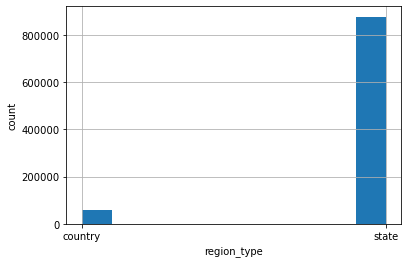

In [56]:
plt.xlabel('region_type')
plt.ylabel('count')
df.region_type.hist()

Here the distribution of data divided by different seasons is plotted.

[]

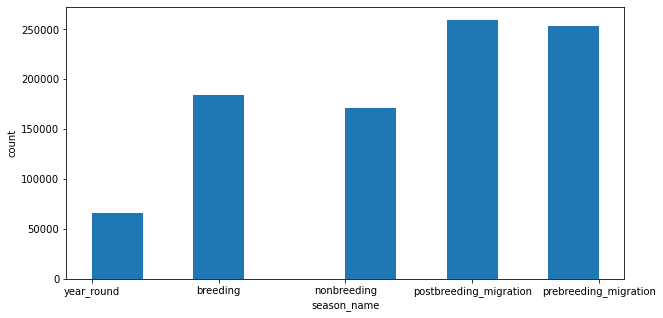

In [58]:
plt.figure(figsize=(10,5))
plt.hist(df.season_name)
plt.xlabel('season_name')
plt.ylabel('count')
plt.plot()

Now we summarized the data by countries.

In this way we obtained, for each country, the number of seasons in which a certain species is present. 

In [143]:
df1=df[df.region_type=='country']
df1=df1.groupby(['region_name','scientific_name']).species_code.agg('count')
df1=df1.reset_index()
df1.loc[:, 'number']=df1.species_code
df1.drop(columns='species_code',inplace=True)
df1.head()

,region_name,scientific_name,number
0,Afghanistan,Acridotheres tristis,1
1,Afghanistan,Acrocephalus dumetorum,2
2,Afghanistan,Alauda arvensis,3
3,Afghanistan,Alcedo atthis,4
4,Afghanistan,Alectoris chukar,1


In [ ]:
import geopandas as gpd
import numpy as np

In this part, we analyzed the spatial data concerning the bird species distribution in different seasons.
Thanks to the geographic coordinates provided by the dataset, we can show the distribution of the species.


In [ ]:
df = gpd.read_file('barswa-rangeRaw-2021.gpkg')
df.head()

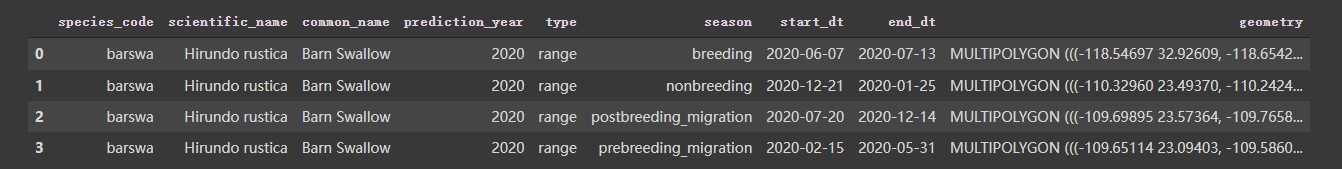

In [ ]:
df.geometry[0]

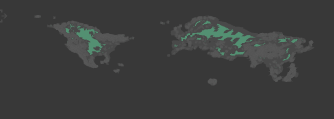

In [ ]:
df.geometry[1]

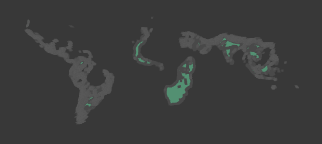

In [ ]:
df.geometry[2]

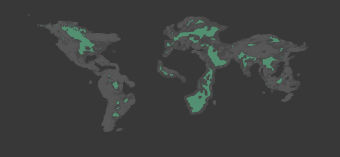

In [ ]:
df.geometry[3]

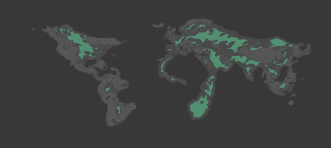